In [ ]:
!pip install -q kaggle
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [ ]:
import pandas as pd

df = pd.read_csv("ecommerce_customer_data_custom_ratios.csv")
df.head()

,Customer ID,Purchase Date,Product Category,Product Price,Quantity,Total Purchase Amount,Payment Method,Customer Age,Returns,Customer Name,Age,Gender,Churn
0,46251,2020-09-08 09:38:32,Electronics,12,3,740,Credit Card,37,0.0,Christine Hernandez,37,Male,0
1,46251,2022-03-05 12:56:35,Home,468,4,2739,PayPal,37,0.0,Christine Hernandez,37,Male,0
2,46251,2022-05-23 18:18:01,Home,288,2,3196,PayPal,37,0.0,Christine Hernandez,37,Male,0
3,46251,2020-11-12 13:13:29,Clothing,196,1,3509,PayPal,37,0.0,Christine Hernandez,37,Male,0
4,13593,2020-11-27 17:55:11,Home,449,1,3452,Credit Card,49,0.0,James Grant,49,Female,1


In [ ]:
df.info()
df.describe()

print("Missing values:\n", df.isnull().sum())

df.drop_duplicates(inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Customer ID            250000 non-null  int64  
 1   Purchase Date          250000 non-null  object 
 2   Product Category       250000 non-null  object 
 3   Product Price          250000 non-null  int64  
 4   Quantity               250000 non-null  int64  
 5   Total Purchase Amount  250000 non-null  int64  
 6   Payment Method         250000 non-null  object 
 7   Customer Age           250000 non-null  int64  
 8   Returns                202404 non-null  float64
 9   Customer Name          250000 non-null  object 
 10  Age                    250000 non-null  int64  
 11  Gender                 250000 non-null  object 
 12  Churn                  250000 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 24.8+ MB
Missing values:
 Customer ID   

In [ ]:
print(df.describe(include='all'))
print(df.nunique())

         Customer ID        Purchase Date Product Category  Product Price  \
count   250000.00000               250000           250000  250000.000000   
unique           NaN               249736                4            NaN   
top              NaN  2022-05-08 12:58:55         Clothing            NaN   
freq             NaN                    3            75052            NaN   
mean     25004.03624                  NaN              NaN     254.659512   
std      14428.27959                  NaN              NaN     141.568577   
min          1.00000                  NaN              NaN      10.000000   
25%      12497.75000                  NaN              NaN     132.000000   
50%      25018.00000                  NaN              NaN     255.000000   
75%      37506.00000                  NaN              NaN     377.000000   
max      50000.00000                  NaN              NaN     500.000000   

             Quantity  Total Purchase Amount Payment Method   Customer Age 

In [ ]:
categorical_columns = df.select_dtypes(include='object').columns
for col in categorical_columns:
    print(f"Value counts for {col}:\n{df[col].value_counts()}\n")

Value counts for Purchase Date:
Purchase Date
2022-05-08 12:58:55    3
2020-11-26 08:38:34    2
2021-10-09 01:01:05    2
2020-05-01 22:58:11    2
2021-04-02 18:20:00    2
                      ..
2021-04-08 07:00:45    1
2022-12-15 06:29:45    1
2022-11-13 11:45:32    1
2021-04-24 20:51:29    1
2021-05-03 21:10:34    1
Name: count, Length: 249736, dtype: int64

Value counts for Product Category:
Product Category
Clothing       75052
Books          74912
Electronics    50185
Home           49851
Name: count, dtype: int64

Value counts for Payment Method:
Payment Method
Credit Card    100486
PayPal          74837
Cash            49894
Crypto          24783
Name: count, dtype: int64

Value counts for Customer Name:
Customer Name
Michael Smith        107
John Smith           103
Jennifer Smith       102
Michael Johnson       98
Lisa Smith            97
                    ... 
Judy Copeland          1
Danielle Thompson      1
Kelli Dougherty        1
James Flores           1
Candace Sawyer

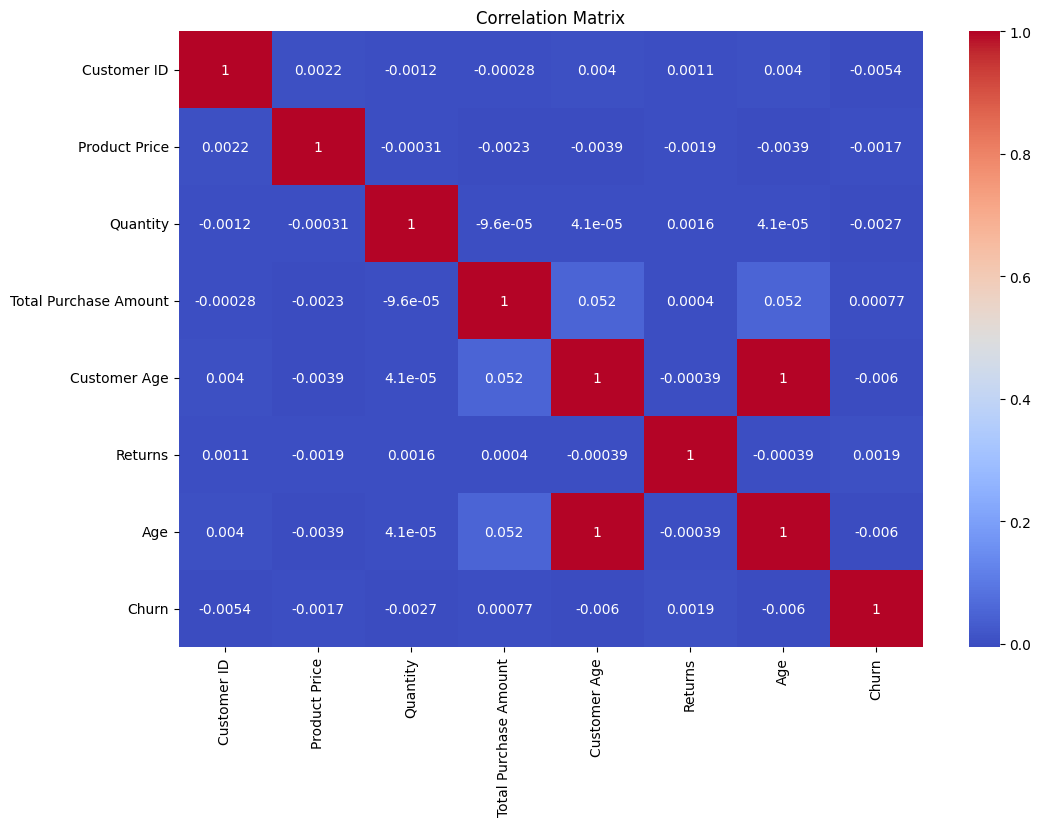

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

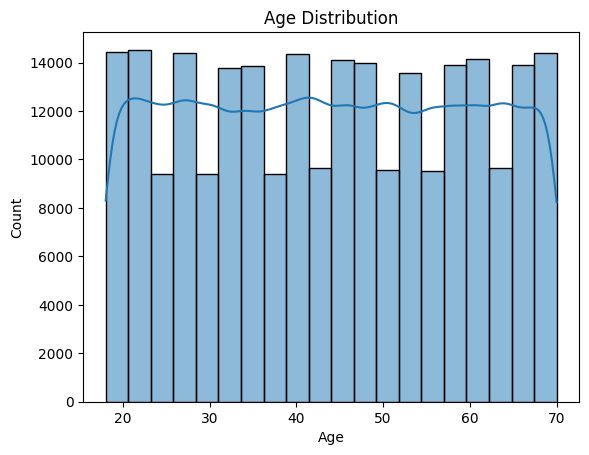

In [ ]:
sns.histplot(df['Age'], kde=True, bins=20)
plt.title('Age Distribution')
plt.show()

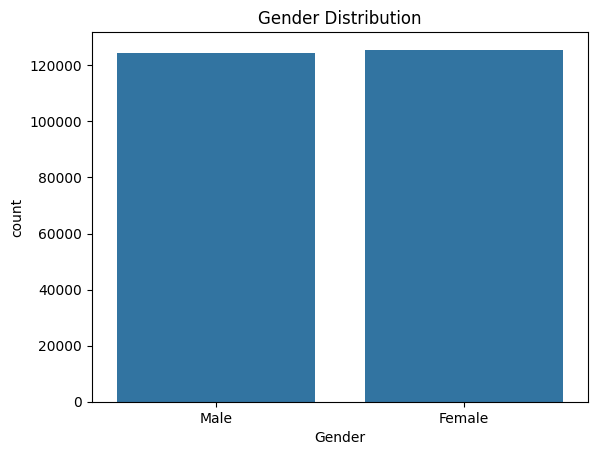

In [ ]:
sns.countplot(data=df, x='Gender')
plt.title('Gender Distribution')
plt.show()

In [ ]:
import pandas as pd

df = pd.read_csv("ecommerce_customer_data_large.csv")
df.head()

,Customer ID,Purchase Date,Product Category,Product Price,Quantity,Total Purchase Amount,Payment Method,Customer Age,Returns,Customer Name,Age,Gender,Churn
0,44605,2023-05-03 21:30:02,Home,177,1,2427,PayPal,31,1.0,John Rivera,31,Female,0
1,44605,2021-05-16 13:57:44,Electronics,174,3,2448,PayPal,31,1.0,John Rivera,31,Female,0
2,44605,2020-07-13 06:16:57,Books,413,1,2345,Credit Card,31,1.0,John Rivera,31,Female,0
3,44605,2023-01-17 13:14:36,Electronics,396,3,937,Cash,31,0.0,John Rivera,31,Female,0
4,44605,2021-05-01 11:29:27,Books,259,4,2598,PayPal,31,1.0,John Rivera,31,Female,0


In [ ]:
df.info()
df.describe()

print("Missing values:\n", df.isnull().sum())

df.drop_duplicates(inplace=True)

for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].astype(str).str.strip()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Customer ID            250000 non-null  int64  
 1   Purchase Date          250000 non-null  object 
 2   Product Category       250000 non-null  object 
 3   Product Price          250000 non-null  int64  
 4   Quantity               250000 non-null  int64  
 5   Total Purchase Amount  250000 non-null  int64  
 6   Payment Method         250000 non-null  object 
 7   Customer Age           250000 non-null  int64  
 8   Returns                202618 non-null  float64
 9   Customer Name          250000 non-null  object 
 10  Age                    250000 non-null  int64  
 11  Gender                 250000 non-null  object 
 12  Churn                  250000 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 24.8+ MB
Missing values:
 Customer ID   

In [ ]:
print(df.describe(include='all'))
print(df.nunique())

          Customer ID        Purchase Date Product Category  Product Price  \
count   250000.000000               250000           250000  250000.000000   
unique            NaN               249728                4            NaN   
top               NaN  2021-11-30 18:52:48      Electronics            NaN   
freq              NaN                    2            62630            NaN   
mean     25017.632092                  NaN              NaN     254.742724   
std      14412.515718                  NaN              NaN     141.738104   
min          1.000000                  NaN              NaN      10.000000   
25%      12590.000000                  NaN              NaN     132.000000   
50%      25011.000000                  NaN              NaN     255.000000   
75%      37441.250000                  NaN              NaN     377.000000   
max      50000.000000                  NaN              NaN     500.000000   

             Quantity  Total Purchase Amount Payment Method   C

In [ ]:
categorical_columns = df.select_dtypes(include='object').columns
for col in categorical_columns:
    print(f"Value counts for {col}:\n{df[col].value_counts(dropna=False)}\n")

Value counts for Purchase Date:
Purchase Date
2021-11-30 18:52:48    2
2023-04-06 14:42:37    2
2022-10-22 20:47:44    2
2021-08-16 07:21:26    2
2022-10-16 00:42:50    2
                      ..
2021-03-26 12:51:31    1
2020-10-26 12:56:31    1
2023-04-19 15:01:54    1
2021-03-04 22:02:14    1
2022-08-19 13:54:52    1
Name: count, Length: 249728, dtype: int64

Value counts for Product Category:
Product Category
Electronics    62630
Clothing       62581
Home           62542
Books          62247
Name: count, dtype: int64

Value counts for Payment Method:
Payment Method
Credit Card    83547
PayPal         83441
Cash           83012
Name: count, dtype: int64

Value counts for Customer Name:
Customer Name
Michael Johnson    119
Michael Smith      116
Michael Brown      106
Michael Jones       94
James Smith         93
                  ... 
Ricardo Jones        1
Omar Ramsey          1
Carlos Copeland      1
Gabriel Barnett      1
Colleen Day          1
Name: count, Length: 39878, dtype: i

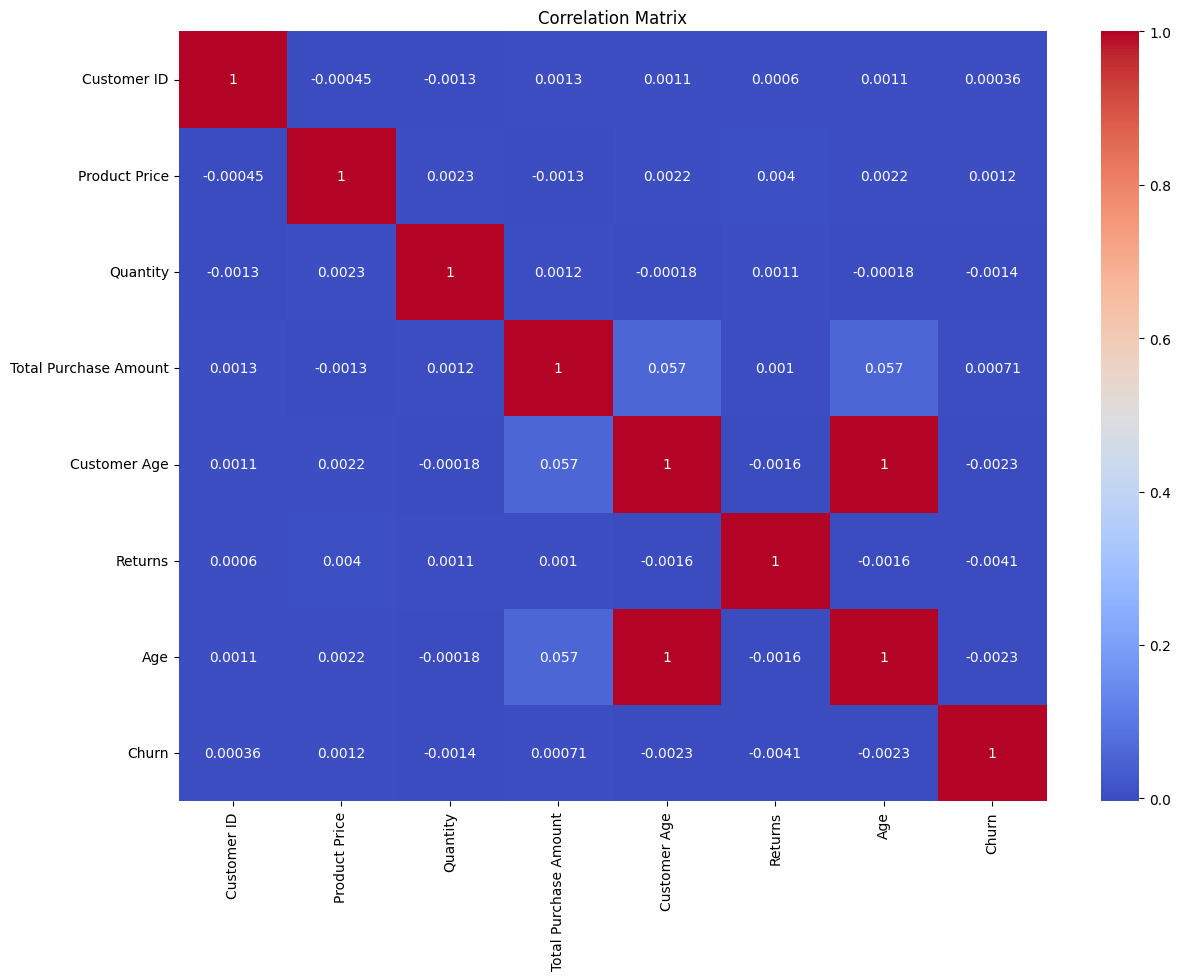

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 10))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

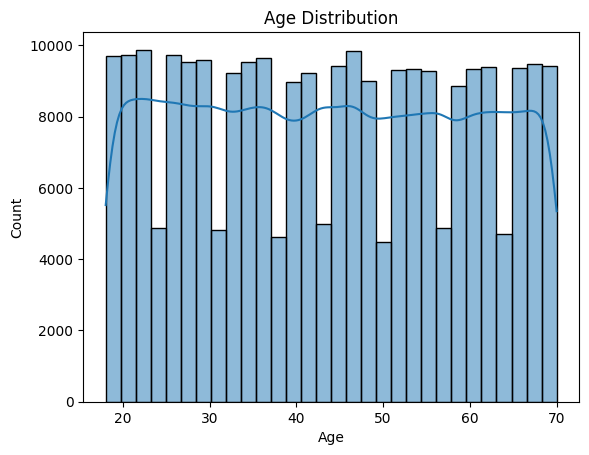

In [ ]:
if 'Age' in df.columns:
    sns.histplot(df['Age'], kde=True, bins=30)
    plt.title('Age Distribution')
    plt.show()

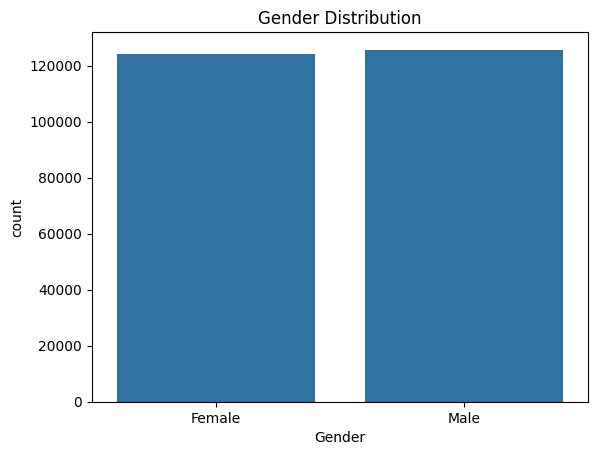

In [ ]:
if 'Gender' in df.columns:
    sns.countplot(data=df, x='Gender')
    plt.title('Gender Distribution')
    plt.show()